In [ ]:
#export
import tensorflow as tf
import logging
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os
import numpy as np
import json
from IPython.display import clear_output
from tqdm.notebook import tqdm

from utils import *

# from pycocotools.coco import COCO
# from pycocotools.cocoeval import COCOeval

%config Completer.use_jedi = False

In [ ]:
def set_memory_growth(gpu_id):
    gpus = tf.config.experimental.list_physical_devices('GPU')
    tf.config.set_visible_devices(gpus[gpu_id], 'GPU')

    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
                logical_gpus = tf.config.experimental.list_logical_devices('GPU')
                logging.info("Detect {} Physical GPUs, {} Logical GPUs.".format(len(gpus), len(logical_gpus)))
        except RuntimeError as e:
            logging.info(e)
            
set_memory_growth(0)

In [ ]:
path_det = '/home/addfor/projects/smart_tray/20_5006v02-intp-detection-foodv01/det1_model/saved_model'
det = tf.saved_model.load(path_det)

In [ ]:
CLASSES_AS_FOOD = ["PRIMO","SECONDO","CONTORNO","INSALATA","PIZZA","PIATTO.UNICO","YOGURT","MINESTRA","DESSERT","PROD.FORNO","BIBITE","FRUTTA", \
        "bread", "yogurt", "fruit", "Food", "Bread", "Fruit", "Yogurt", "other", "yougurt", "single_food", "multi_food", "bulk_food", "drinks", "salad", "mini_salad"]

DATASETS_LIST = [
    "run_3_revisited_5may2021",
    "Sodexo_revisited_8jun",
    "Test_Empoli_01_06_2021",
    "Test_Empoli_08_06_2021",
    "Test_Empoli_09_06_2021",
    "Test_Empoli_26_05_2021",
    "Test_Empoli_27_05_2021",
    "Test_Empoli_28_05_2021",
    "Test_Empoli_29_04_2021",
    "Test_Empoli_30_04_2021",
    "Test_Empoli_31_05_2021",
    "Test_Empoli_from_10_06_2021_to_30_06_2021",
    "UNIMIB_revisited_7giu2021"
]
DATASETS_LIST = [Path(ds) for ds in DATASETS_LIST]

BASE_PATH = Path('/mnt/data/smarttray/dataset_05jul2021_av3b')

ths = [0.0, 0.15, 0.2, 0.25, 0.3, 0.35, 0.375, 0.4, 0.425, 0.45, 0.5, 0.55, 0.6, 0.65]

with open(BASE_PATH/'COCO_format_results(Adrian)/det1/smart_tray_ds.json') as f:
    imgs_metadata = json.load(f)["images"]

# Getting and saving the validation predictions as np arrays



In [ ]:
# def draw_bbs(img, bbs, color):
#     height, width, _ = img.shape
#     for ymin, xmin, ymax, xmax in bbs:
#         cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), color, 10)

In [ ]:
# preds = {th:[] for th in ths}

# def get_img_id(img_name, imgs_metadata):
#     for metadata in imgs_metadata:
#         if metadata['file_name'] == img_name:
#             return metadata['id']

# for ds in DATASETS_LIST:
#     print(f'Doing dataset {ds}\n', end='\r')
    
#     path = BASE_PATH/ds/'val'/'images'
#     if not os.path.exists(path): continue
#     imgs_path = list(path.iterdir())
#     for img_path in tqdm(imgs_path):
        
#         img_id = get_img_id(img_path.name, imgs_metadata)
#         if img_id is None: continue
        
#         img = cv2.imread(str(img_path))
#         h, w, _ = img.shape
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = cv2.resize(img, (400,400), interpolation=cv2.INTER_AREA)

#         out = det(img[None])
#         all_scrs, all_bbs, all_classes = out['detection_scores'].numpy(), out['detection_boxes'].numpy(), out['detection_classes'].numpy()
#         for th in ths:    
#             bbs, classes, scrs = all_bbs[all_scrs > th], all_classes[all_scrs > th], all_scrs[all_scrs > th]         
#             bbs = [[int(x1*w), int(y1*h), int(x2*w), int(y2*h)] for y1, x1, y2, x2 in bbs]
# #             bbs = [[int(x1*w), int(y1*h), int(x2*w), int(y2*h)] for x1, y1, x2, y2 in bbs]

                            
#             for (x1,y1,x2,y2), cls, scr in zip(bbs, classes,scrs):
#                 preds[th].append([img_id, x1, y1, x2-x1, y2-y1, scr, int(cls)])
#         img_id += 1
        
# #         bbs = [[y1*400/h,x1*400/w,y2*400/h,x2*400/w] for x1, y1, x2, y2 in bbs]
# #         print(bbs, img.shape)
# #         draw_bbs(img, bbs, [0,0,255])
# #         fig, ax = plt.subplots(figsize=(7,6))
# #         ax.imshow(img)
# #         plt.show()
# #         input('Press enter to continue')
# #         clear_output()

# for th, p in preds.items():
#     np.save(BASE_PATH/f'COCO_format_results(Adrian)/det1/dets1_th_{th}', np.array(p))

486 629 1262 1379
1571 728 2043 1149
1446 1407 1933 2156
494 629 1259 1379
1418 1382 1969 2127
1559 731 2033 1151


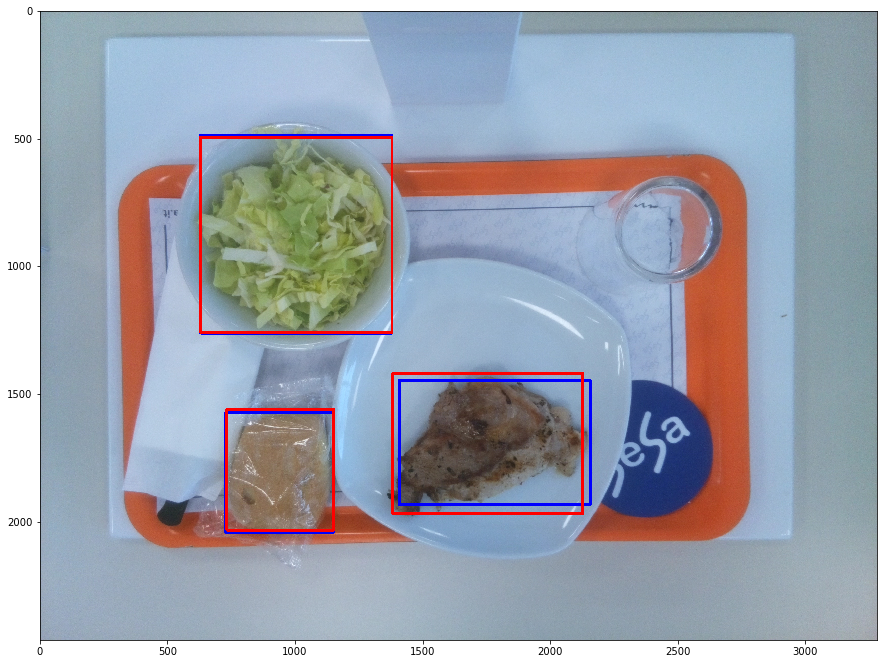

In [ ]:
cocoGt = COCO(BASE_PATH/'COCO_format_results(Adrian)/det1/smart_tray_ds.json')
dts = np.load(BASE_PATH/'COCO_format_results(Adrian)/det1/dets1_th_0.425.npy')
cocoDt = cocoGt.loadRes(dts)
clear_output()

for img_id in range(100):
    try: img_dict = cocoGt.imgs[img_id]
    except: continue
    img_path = BASE_PATH/"run_3_revisited_5may2021/val/images"/cocoGt.imgs[img_id]['file_name']
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    Dtbbs = []
    for ann in cocoDt.imgToAnns[img_id]:
        x,y,w,h = ann['bbox']
        Dtbbs.append([y,x,y+h,x+w])
            
    Gtbbs = []
    for ann in cocoGt.imgToAnns[img_id]:
        x,y,w,h = ann['bbox']
        Gtbbs.append([y,x,y+h,x+w])
    
    draw_bbs(img,Gtbbs,[0,0,255])
    draw_bbs(img,Dtbbs,[255,0,0])

    fig, ax = plt.subplots(figsize=(15,15))
    ax.imshow(img)
    plt.show()
    
    x = input('press enter')
    if x=='c': raise Exception()
    
    clear_output()

# Measurign performance using Pycocotools


In [ ]:
ths = [0.0, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

all_stats = []
for th in ths:
    cocoGt = COCO(BASE_PATH/'COCO_format_results(Adrian)/det1/smart_tray_ds.json')
    dts = np.load(BASE_PATH/'COCO_format_results(Adrian)/det1'/f'dets1_th_{th}.npy')
    cocoDt = cocoGt.loadRes(dts)
    cocoEval = COCOeval(cocoGt,cocoDt,'bbox')
    cocoEval.evaluate()
    cocoEval.accumulate()
    cocoEval.summarize()
    
    all_stats.append(cocoEval.stats)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Loading and preparing results...
Converting ndarray to lists...
(191399, 7)
0/191399
DONE (t=1.31s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=10.50s).
Accumulating evaluation results...
DONE (t=0.77s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.826
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.954
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.826
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.316
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.862
 Average R

DONE (t=0.87s).
Accumulating evaluation results...
DONE (t=0.09s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.821
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.989
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.954
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.821
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.316
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.857
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.857
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=

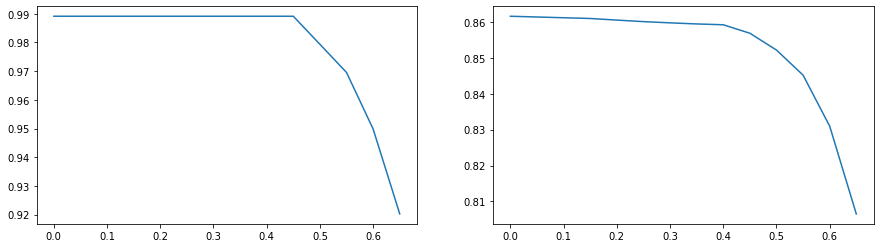

In [ ]:
AP_IOU50 = np.array(all_stats).T[1]
R_IOU50 = np.array(all_stats).T[7]
fig, axs = plt.subplots(ncols=2, figsize=(15,4))
axs[0].plot(ths, AP_IOU50); axs[1].plot(ths, R_IOU50)

# Measuring the performance on my own 

In [ ]:
def area(b): return b[2]*b[3]

def IoU(b1, b2):
    x1, y1, w1, h1 = b1
    x2, y2, w2, h2 = b2
    xminInt = max(x1, x2)
    xmaxInt = min(x1 + w1, x2 + w2)
    yminInt = max(y1, y2)
    ymaxInt = min(y1 + h1, y2 + h2)
    AInt = area((xminInt, yminInt, xmaxInt - xminInt,  ymaxInt - yminInt))
    return AInt/(area(b1) + area(b2) - AInt)

def nms(anns, nms_iou_th=0.8):
    anns = sorted(anns, key=lambda x: x['score'])
    i = 0 
    while i < len(anns):
        bb1 = anns[i]['bbox']
        j = i + 1
        while j < len(anns):
            bb2 = anns[j]['bbox']
            if IoU(bb1, bb2) > nms_iou_th: anns.pop(j)
            else: j += 1
        i += 1
    return anns

In [ ]:
IoU((0,0,0.5,0.5), (0.25, 0.25, 0.5, 0.5)) == 1/7, IoU((0,0,0.5,0.5), (0, 0, 0.75, 0.75)) == 4/9

(True, True)

In [ ]:
def get_metrics(gt, dt, IoU_th, with_nms=False, nms_th=0.8):
    used_pbbs = []
    dt = nms(dt, nms_th) if with_nms else dt
    for ann in gt:
        bb = ann['bbox']
        for pred_ann in dt:
            pbb = pred_ann['bbox']
            if IoU(bb, pbb) > IoU_th and pred_ann['id'] not in used_pbbs:
                used_pbbs.append(pred_ann['id'])
                break

    TP = len(used_pbbs)
    FP = len(dt) - TP
    FN = len(gt) - TP

    p = TP/(TP + FP) if TP + FP > 0 else 0
    r = TP/(TP + FN)
    return p, r

def get_avg_metrics(cocoGt, cocoDt, IoU_th, with_nms=False, nms_th=0.8):
    ps, rs = [], []
    for img_id in cocoGt.getImgIds():
        gt = cocoGt.imgToAnns[img_id]
        dt = cocoDt.imgToAnns[img_id]
        p, r = get_metrics(gt, dt, IoU_th, with_nms, nms_th)
        ps.append(p); rs.append(r)
    return sum(ps)/len(ps), sum(rs)/len(rs)

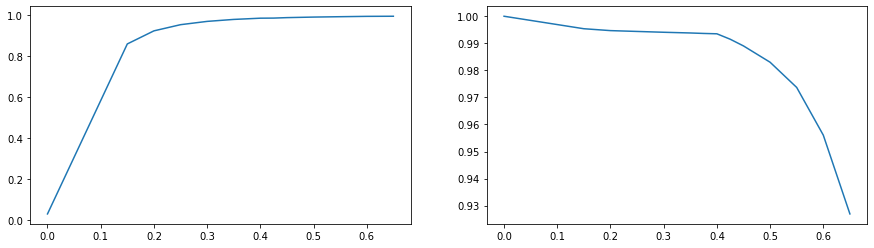

In [ ]:
ths = [0.0, 0.15, 0.2, 0.25, 0.3, 0.35, 0.375, 0.4, 0.425, 0.45, 0.5, 0.55, 0.6, 0.65]

ps, rs = [], []
for th in ths:
    cocoGt = COCO(BASE_PATH/'COCO_format_results(Adrian)/det1/smart_tray_ds.json')
    dts = np.load(BASE_PATH/'COCO_format_results(Adrian)/det1'/f'dets1_th_{th}.npy')
    cocoDt = cocoGt.loadRes(dts)
    p, r = get_avg_metrics(cocoGt, cocoDt, IoU_th=0.5, with_nms=False, nms_th=1)
    ps.append(p); rs.append(r)
    clear_output()

fig, axs = plt.subplots(ncols=2, figsize=(15,4))
axs[0].plot(ths, ps); axs[1].plot(ths, rs)

(0.4, 0.9889375790723727)

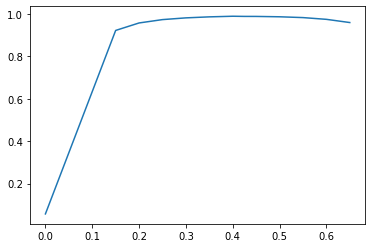

In [ ]:
ps, rs = np.array(ps), np.array(rs)
f1s = 2*ps*rs/(ps + rs)
plt.plot(ths, f1s)
ths[f1s.argmax()], f1s.max()